# Аппроксимация функции методом наименьших квадратов

**Цель работы:** нахождение функции $\varphi(x)$, которая является наилучшим приближением заданной табличной функции $f(x)$, используя метод наименьших квадратов.

В работе рассматриваются следующие аппроксимирующие функции:
* *линейная*: $\varphi(x) = ax + b$
* *квадратичная* (полиномиал 2-й степени): $\varphi(x) = a_0 + a_1x + a_2x^2$
* *экспоненциальная*: $\varphi(x) = a^{ebx}$
* *логарифмическая*: $\varphi(x) = a + b\cdot ln(x)$
* *степенная*: $\varphi(x) = ax^b$.

## Методика исследования

Для каждой из исследуемых функций $\varphi(x)$ вычисляются мера отклонения $S$ и среднеквадратичное отклонение $\delta$:

$$S = \sum_{i=1}^n (\varphi(x_i) - y_i)^2,\ \delta = \sqrt{\frac{\sum_{i=1}^2 (\varphi(x_i) - y_i)^2}{n}}$$

In [1]:
def squared_error(f, xs, ys):
  return sum((f(x) - y)**2 for (x, y) in zip(xs, ys))

def stddev(f, xs, ys):
  return np.sqrt(squared_error(f, xs, ys) / len(xs))

Значения коэффициентов каждой функции уточняются путем минимизации меры отклонения $S$.

### Линейная аппроксимация

Для линейной функции мера отклонения принимает вид $S = \sum_{i=1}^N (ax_i + b - y_i)^2$. Условие минимума в таком случае:

\begin{cases}\frac{\partial S}{\partial a} = 0 \\\\ \frac{\partial S}{\partial b} = 0\end{cases}

Путем преобразований получим выражения для нахождения $a$ и $b$, при которых $S(a, b)$ принимает минимальное значение:

$$a = \frac{n\sum x_i y_i - \sum x_i \cdot \sum y_i}{n\sum x_i^2 - \sum x_i \cdot \sum x_i},\ b = \frac{\sum x_i^2 \sum y_i - \sum x_i \sum x_i y_i}{n\sum x_i^2 - \sum x_i \cdot \sum x_i}$$

In [2]:
import numpy as np

def linapprox_coeffs(xs, ys):
  a = (len(xs)*np.sum(xs*ys) - np.sum(xs)*np.sum(ys)) / (len(xs)*np.sum(xs**2) - np.sum(xs)**2)
  b = (np.sum(xs**2)*np.sum(ys) - np.sum(xs)*np.sum(xs*ys)) / (len(xs)*np.sum(xs**2) - np.sum(xs)**2)
  return a, b

def linapprox(xs, ys):
  a, b = linapprox_coeffs(xs, ys)
  return (f'Линейная: ${np.round(a, 2)}x {"+" if b >= 0 else ""} {np.round(b, 2)}$',
          lambda x: a*x + b)

### Квадратичная аппроксимация

Для квадратичной функции мера к минимуму приводится мера отклонения $S = \sum_{i=1}^N (a_0 + a_1 x_i + a_2 x_i^2 - y_i)^2$. Приравняв к нулю частные производные $S$ по неизвестным параметрам, получим систему, в которой неизвестными выступают коэффициенты $a_0, a_1, a_2$ при $S_{min}(a_0, a_1, a_2)$. Запишем ее в матричной форме:

$$\begin{bmatrix}
  n & \sum x_i & \sum x_i^2 \\
  \sum x_i & \sum x_i^2 & \sum x_i^3 \\
  \sum x_i^2 & \sum x_i^3 & \sum x_i^4
\end{bmatrix} \cdot \begin{bmatrix}
a_0 \\ a_1 \\ a_2
\end{bmatrix} = \begin{bmatrix}
\sum y_i \\ \sum x_i y_i \\ \sum x_i^2 y_i
\end{bmatrix}$$


In [3]:
def quadapprox(xs, ys):
  matrix_a = np.array([
    [len(xs), np.sum(xs), np.sum(xs**2)],
    [np.sum(xs), np.sum(xs**2), np.sum(xs**3)],
    [np.sum(xs**2), np.sum(xs**3), np.sum(xs**4)]
  ])
  matrix_b = np.array([np.sum(ys), np.sum(xs*ys), np.sum(xs**2 * ys)])
  a0, a1, a2 = np.linalg.solve(matrix_a, matrix_b)
  return (f'Квадратичная: ${np.round(a0, 2)} {"+" if a1 >= 0 else ""} {np.round(a1, 2)}x {"+" if a2 >= 0 else ""} {np.round(a2, 2)}x^2$',
          lambda x: a0 + a1*x + a2 * x**2)

### Экспоненциальная аппроксимация

Для применения метода наименьших квадратов экспоненциальная функция $\varphi(x) = a^{ebx}$ линеаризуется:

$$ln(a^{ebx}) = ln(a) + bx$$

Получим линейную зависимость $Y = AX + B$, приняв $Y = ln(\varphi(x)), X = x, A = ln(a), B = b$. После определения коэффициентов $A$ и $B$ вернемся к принятым выше обозначениям: $a = e^A, b = B$.

In [4]:
def expapprox(xs, ys):
  ln_a, b = linapprox_coeffs(xs, np.log(ys))
  a = np.exp(ln_a)
  return (f'Экспоненциальная: ${np.round(a, 2)}^{{e{np.round(b, 2)}x}}$',
          lambda x: a**(np.e * b * x))

### Логарифмическая аппроксимация

Как и в случае экспоненциальной аппроксимации, для $\varphi(x) = a + bln(x)$ вводятся обозначения $Y = y, X = ln(x), A = ln(a), B = b$. После определения линейных коэффициентов восстановим $a = e^A$ и $b = B$.

In [5]:
def logapprox(xs, ys):
  ln_a, b = linapprox_coeffs(np.log(xs), ys)
  a = np.exp(ln_a)
  return (f'Логарифмическая: ${np.round(a, 2):.2f} {"+" if b > 0 else ""} {np.round(b, 2)}ln(x)$',
          lambda x: a + b*np.log(x))

### Степенная аппроксимация

Введем для $\varphi(x) = ax^b$ обозначения $Y = ln(\varphi(x)), X = ln(x), A = ln(a), B = b$, найдем линейные коэффициенты $A$ и $B$, выразим $a$ и $b$ обратно: $a = e^A, b = B$.

In [6]:
def powapprox(xs, ys):
  ln_a, b = linapprox_coeffs(np.log(xs), np.log(ys))
  a = np.exp(ln_a)
  return (f'Степенная: ${np.round(a, 2)}x^{{{np.round(b, 2)}}}$',
          lambda x: a * x**b)

## Нахождение оптимальной функции

На основании входных массивов $x$ и $y$ для каждой аппроксимирующей функции находятся оптимальные коэффициенты и рассчитываются значения *меры отклонения* $S$, *среднеквадратичного отклонения* $\delta$

In [7]:
import pandas as pd

def function_table(xs, ys):
  def analyze_function(fn_builder):
    label, f = fn_builder(xs, ys)
    return [label, squared_error(f, xs, ys), stddev(f, xs, ys)]

  results = np.array(list(map(analyze_function, [linapprox, quadapprox, expapprox, logapprox, powapprox])))

  pd.set_option('max_colwidth', 1000); pd.set_option('display.float_format', '{:.3e}'.format)
  df = pd.DataFrame(results, columns=["Функция", "$S$", "$\delta$"])
  df["$S$"] = df["$S$"].astype('float'); df["$\delta$"] = df["$\delta$"].astype('float')
  return df.round(3)

## Построение графиков функций

In [8]:
import matplotlib.pyplot as plt

def plot_functions(xs, ys):
  def plot_function(fn_builder):
    label, f = fn_builder(xs, ys)
    xs_range = np.arange(np.min(xs), np.max(xs), step=0.1)
    plt.figure(figsize=(7, 4))
    plt.plot(xs, ys, 'o')
    plt.plot(xs_range, list(map(f, xs_range)))
    plt.grid()
    plt.title(label)
    plt.show()
  for fn in [linapprox, quadapprox, expapprox, logapprox, powapprox]:
    plot_function(fn)

## Чтение исходных данных из файла



,Функция,$S$,$\delta$
0,Линейная: $22.7x -9.5$,2.843e+02,7.541e+00
1,Квадратичная: $19.0 -1.73x + 4.07x^2$,5.223e+01,3.232e+00
2,Экспоненциальная: $1.53^{e2.63x}$,1.354e+13,1.646e+06
3,Логарифмическая: $57212644027298454962176.00 + 8.43ln(x)$,1.637e+46,5.721e+22
4,Степенная: $2.8x^{2.91}$,4.453e+04,9.437e+01


Наиболее оптимальная функция:
Квадратичная: $19.0  -1.73x + 4.07x^2$


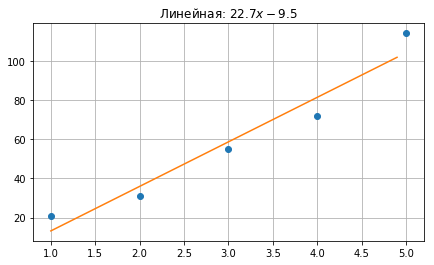

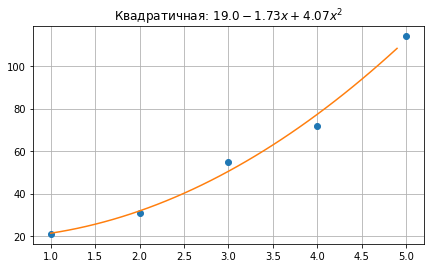

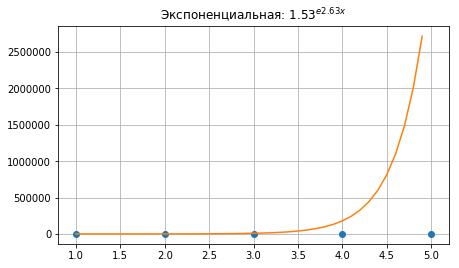

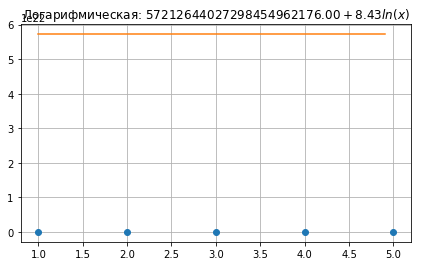

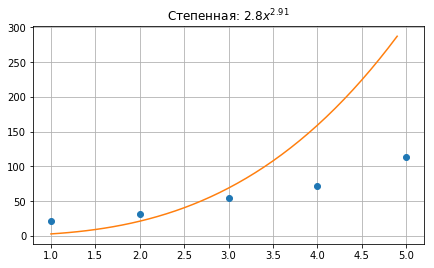

Вы можете сохранить результат в файл:


In [9]:
%matplotlib inline

from IPython.display import display
import ipywidgets as widgets

def display_file_input(file_chosen_cb, description, placeholder, button_text):
  file_input = widgets.Text(description=description, placeholder=placeholder,
                            layout=widgets.Layout(width='600px'))
  file_input_button = widgets.Button(description=button_text)
  file_input_button.on_click(lambda _: file_chosen_cb(file_input.value))
  display(widgets.HBox([file_input, file_input_button]))

def run(path):
  xs, ys = np.loadtxt(path)
  funs = function_table(xs, ys)
  display(funs)
  optimal_fn = f'Наиболее оптимальная функция:\n{funs.iloc[funs["$S$"].idxmin()][0]}'
  print(optimal_fn)
  plot_functions(xs, ys)
  def save(path):
    with open(path, 'w') as dst:
      pd.set_option('display.expand_frame_repr', False)
      df = function_table(xs, ys)
      df.columns = ['Функция', 'S', 'Среднеквадратичное отклонения']
      dst.write(str(df) + '\n\n' + optimal_fn + '\n')
    print('Файл сохранен.')

  print('Вы можете сохранить результат в файл:')
  display_file_input(save, 'Сохранить в:', 'Файл результата', 'Сохранить')
  
display_file_input(run, 'Загрузить:',
  'Путь к файлу с X на одной строке и Y на другой; значения разделены пробелом', 'Открыть')

## Пример входных данных

In [10]:
from random import randint

xs = np.array([1, 2, 3, 4, 5])
ys = np.array([3 * x**2 + 6*x + randint(0, 12) for x in xs])

np.savetxt('test', np.array([xs, ys]))